In [4]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [5]:
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate
from pathlib import Path
import numpy as np
import fastai
fastai.__version__

'1.0.61'

In [10]:
path = Path('/home/pico/uni/romi/rl_sony/best_next_move_3d_reconstruction/data/selected_classes_2d_224x224/training-test')

In [11]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, valid_pct=0.2,
        ds_tfms=None, size=224, num_workers=4).normalize(imagenet_stats)

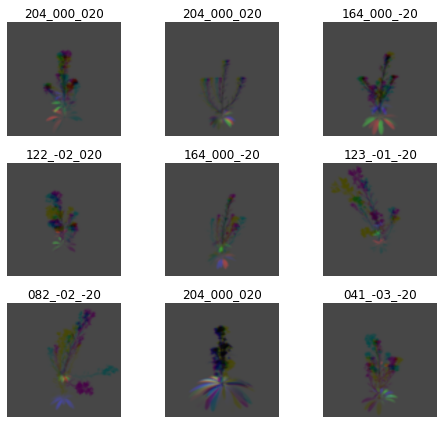

In [12]:
data.show_batch(rows=3, figsize=(7,6))

In [13]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['041_-03_-20',
  '081_-03_020',
  '082_-02_-20',
  '122_-02_020',
  '123_-01_-20',
  '163_-01_020',
  '164_000_-20',
  '204_000_020'],
 8,
 37550,
 9387)

In [14]:
learn = cnn_learner(data, models.resnet18, metrics=(accuracy,error_rate))

In [9]:
#learn.model

In [10]:
learn.fit_one_cycle(6)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.507927,1.200346,0.491318,0.508682,02:43
1,0.992282,0.883511,0.594013,0.405987,03:05
2,0.794389,0.663037,0.713966,0.286034,03:07
3,0.645333,0.556422,0.776286,0.223714,03:08
4,0.536552,0.491826,0.803558,0.196442,03:08
5,0.514694,0.479029,0.810056,0.189944,03:08


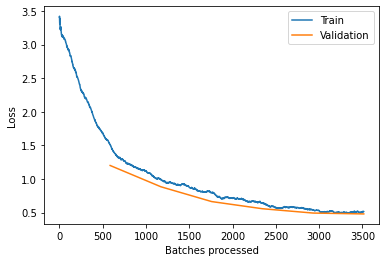

In [11]:
learn.recorder.plot_losses()

In [12]:
learn.save('stage-1')

## Results

In [13]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

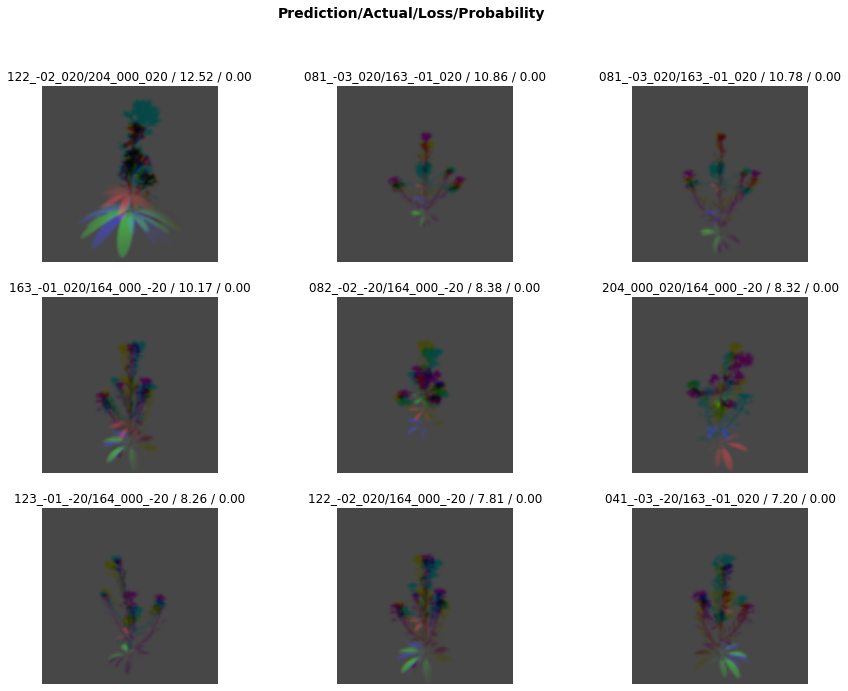

In [14]:
interp.plot_top_losses(9, figsize=(15,11))

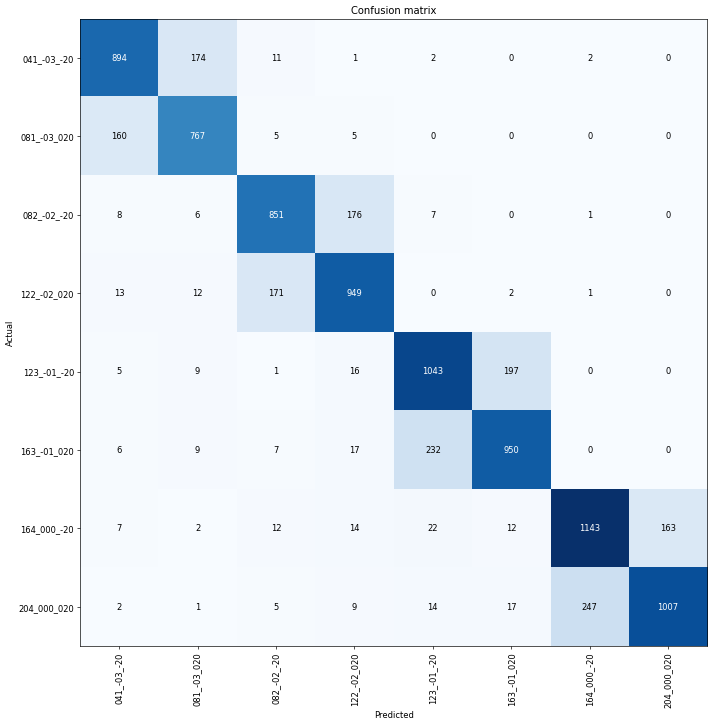

In [15]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [16]:
interp.most_confused(min_val=2)

[('204_000_020', '164_000_-20', 247),
 ('163_-01_020', '123_-01_-20', 232),
 ('123_-01_-20', '163_-01_020', 197),
 ('082_-02_-20', '122_-02_020', 176),
 ('041_-03_-20', '081_-03_020', 174),
 ('122_-02_020', '082_-02_-20', 171),
 ('164_000_-20', '204_000_020', 163),
 ('081_-03_020', '041_-03_-20', 160),
 ('164_000_-20', '123_-01_-20', 22),
 ('163_-01_020', '122_-02_020', 17),
 ('204_000_020', '163_-01_020', 17),
 ('123_-01_-20', '122_-02_020', 16),
 ('164_000_-20', '122_-02_020', 14),
 ('204_000_020', '123_-01_-20', 14),
 ('122_-02_020', '041_-03_-20', 13),
 ('122_-02_020', '081_-03_020', 12),
 ('164_000_-20', '082_-02_-20', 12),
 ('164_000_-20', '163_-01_020', 12),
 ('041_-03_-20', '082_-02_-20', 11),
 ('123_-01_-20', '081_-03_020', 9),
 ('163_-01_020', '081_-03_020', 9),
 ('204_000_020', '122_-02_020', 9),
 ('082_-02_-20', '041_-03_-20', 8),
 ('082_-02_-20', '123_-01_-20', 7),
 ('163_-01_020', '082_-02_-20', 7),
 ('164_000_-20', '041_-03_-20', 7),
 ('082_-02_-20', '081_-03_020', 6),
 

In [17]:
learn.unfreeze()

In [18]:
learn.lr_find(start_lr=1e-6, end_lr=1e-1)

epoch,train_loss,valid_loss,accuracy,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


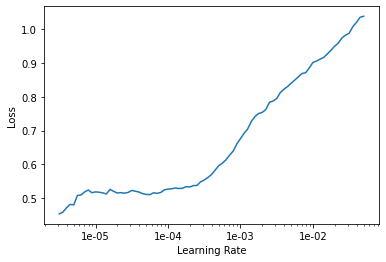

In [19]:
# If the plot is not showing try to give a start and end learning rate
# learn.lr_find(start_lr=1e-5, end_lr=1e-1)
learn.recorder.plot()

In [20]:
#learn.fit_one_cycle(2, max_lr=slice(1e-7,1e-5))
learn.fit_one_cycle(4, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.465848,0.440387,0.829125,0.170875,04:00
1,0.400855,0.389383,0.850858,0.149142,04:27
2,0.337776,0.362343,0.862895,0.137105,04:26
3,0.311872,0.357173,0.863854,0.136146,04:25


In [21]:
learn.save('stage-2')

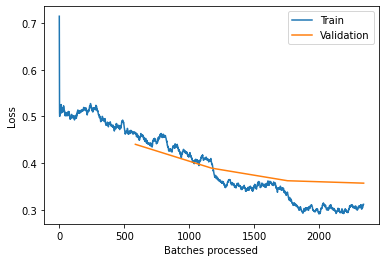

In [22]:
learn.recorder.plot_losses()

In [15]:
learn.load('stage-2');

FileNotFoundError: [Errno 2] No such file or directory: '/home/pico/uni/romi/rl_sony/best_next_move_3d_reconstruction/data/selected_classes_2d_224x224/training-test/models/stage-2.pth'

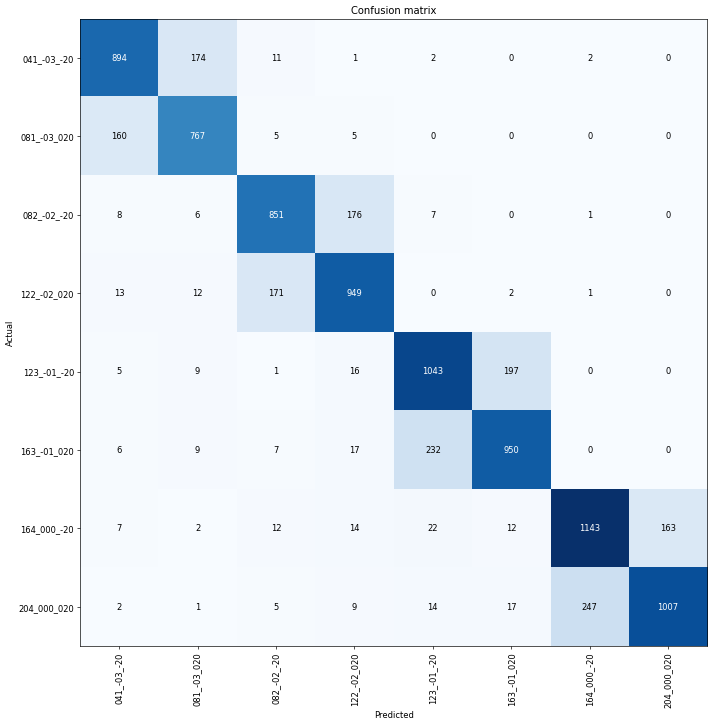

In [23]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [24]:
interp.most_confused(min_val=2)

[('204_000_020', '164_000_-20', 247),
 ('163_-01_020', '123_-01_-20', 232),
 ('123_-01_-20', '163_-01_020', 197),
 ('082_-02_-20', '122_-02_020', 176),
 ('041_-03_-20', '081_-03_020', 174),
 ('122_-02_020', '082_-02_-20', 171),
 ('164_000_-20', '204_000_020', 163),
 ('081_-03_020', '041_-03_-20', 160),
 ('164_000_-20', '123_-01_-20', 22),
 ('163_-01_020', '122_-02_020', 17),
 ('204_000_020', '163_-01_020', 17),
 ('123_-01_-20', '122_-02_020', 16),
 ('164_000_-20', '122_-02_020', 14),
 ('204_000_020', '123_-01_-20', 14),
 ('122_-02_020', '041_-03_-20', 13),
 ('122_-02_020', '081_-03_020', 12),
 ('164_000_-20', '082_-02_-20', 12),
 ('164_000_-20', '163_-01_020', 12),
 ('041_-03_-20', '082_-02_-20', 11),
 ('123_-01_-20', '081_-03_020', 9),
 ('163_-01_020', '081_-03_020', 9),
 ('204_000_020', '122_-02_020', 9),
 ('082_-02_-20', '041_-03_-20', 8),
 ('082_-02_-20', '123_-01_-20', 7),
 ('163_-01_020', '082_-02_-20', 7),
 ('164_000_-20', '041_-03_-20', 7),
 ('082_-02_-20', '081_-03_020', 6),
 

In [32]:
#preds, y, losses = learn.get_preds(ds_type=DatasetType.Test, with_loss=True)
#y = torch.argmax(preds, dim=1)

## Test set

In [33]:
test_data = ImageDataBunch.from_folder(path, train='train', valid='test',
        ds_tfms=None, size=224, num_workers=4).normalize(imagenet_stats)

In [34]:
test_data.classes, test_data.c, len(test_data.train_ds), len(test_data.valid_ds)

(['grass-grass',
  'grass-soil',
  'grass-stone',
  'soil-grass',
  'soil-soil',
  'soil-stone',
  'stone-grass',
  'stone-soil',
  'stone-stone'],
 9,
 9000,
 1800)

In [35]:
test_learn = cnn_learner(test_data, models.resnet18, metrics=(accuracy,error_rate)).load('stage-2')

In [36]:
test_interp = ClassificationInterpretation.from_learner(test_learn)

test_losses,test_idxs = test_interp.top_losses()

len(test_data.valid_ds)==len(test_losses)==len(test_idxs)

True

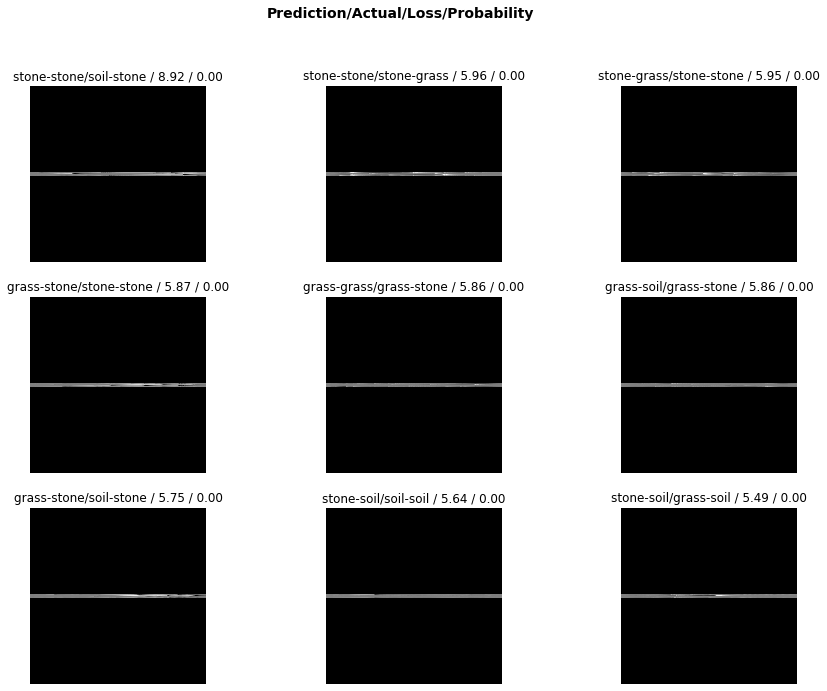

In [37]:
test_interp.plot_top_losses(9, figsize=(15,11))

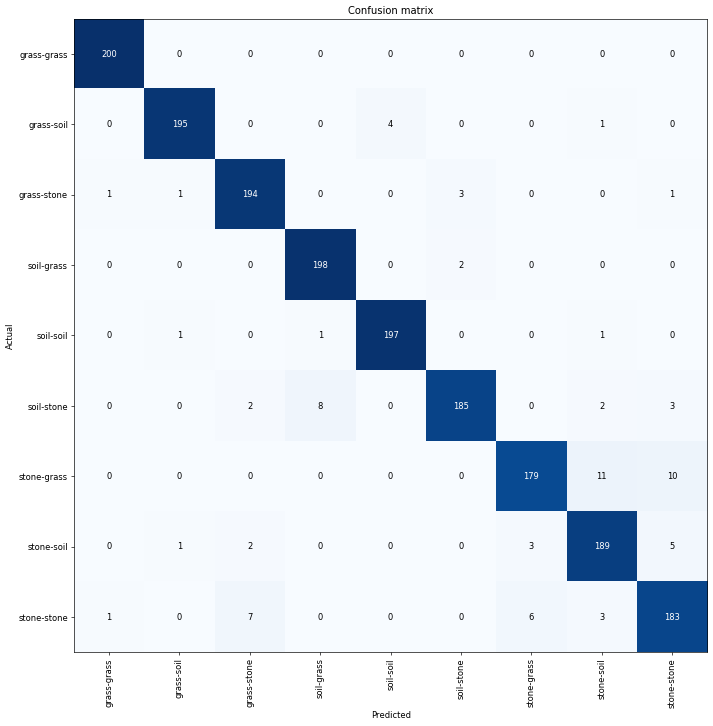

In [38]:
test_interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [39]:
test_interp.most_confused(min_val=2)

[('stone-grass', 'stone-soil', 11),
 ('stone-grass', 'stone-stone', 10),
 ('soil-stone', 'soil-grass', 8),
 ('stone-stone', 'grass-stone', 7),
 ('stone-stone', 'stone-grass', 6),
 ('stone-soil', 'stone-stone', 5),
 ('grass-soil', 'soil-soil', 4),
 ('grass-stone', 'soil-stone', 3),
 ('soil-stone', 'stone-stone', 3),
 ('stone-soil', 'stone-grass', 3),
 ('stone-stone', 'stone-soil', 3),
 ('soil-grass', 'soil-stone', 2),
 ('soil-stone', 'grass-stone', 2),
 ('soil-stone', 'stone-soil', 2),
 ('stone-soil', 'grass-stone', 2)]

In [40]:
test_learn.validate(metrics=(accuracy,error_rate))

[0.13282798, tensor(0.9556), tensor(0.0444)]